In [2]:
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

In [3]:
ann=[]
for folder, subs, files in os.walk('Desktop/Thesis/Evaluation/ann/'):
        for filename in files:
            ann.append(os.path.join(folder, filename))
pix=[]
for folder, subs, files in os.walk('Desktop/Thesis/Evaluation/pix/'):
        for filename in files:
            pix.append(os.path.join(folder, filename))
cyc=[]
for folder, subs, files in os.walk('Desktop/Thesis/Evaluation/cyc/'):
        for filename in files:
            cyc.append(os.path.join(folder, filename))
fac=[]
for folder, subs, files in os.walk('Desktop/Thesis/Evaluation/factor/'):
        for filename in files:
            fac.append(os.path.join(folder, filename))
synth=[]
for folder, subs, files in os.walk('Desktop/Thesis/Evaluation/synth/'):
        for filename in files:
            synth.append(os.path.join(folder, filename))

In [9]:
ssim=[]
for index, (value1, value2) in enumerate(zip(ann, pix)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = measure.compare_ssim(ori,tar, multichannel=True)
    ssim.append(s)
print("SSIM score for Pix2pix")
print(np.mean(ssim))

SSIM score for Pix2pix
0.7999842053140385


In [10]:
ssim=[]
for index, (value1, value2) in enumerate(zip(ann, cyc)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = measure.compare_ssim(ori,tar, multichannel=True)
    ssim.append(s)
print("SSIM score for CycleGAN")
print(np.mean(ssim))

SSIM score for CycleGAN
0.6929300748014456


In [11]:
ssim=[]
for index, (value1, value2) in enumerate(zip(ann, fac)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = measure.compare_ssim(ori,tar, multichannel=True)
    ssim.append(s)
print("SSIM score for FactorGAN")
print(np.mean(ssim))

SSIM score for FactorGAN
0.7412944807165732


In [12]:
ssim=[]
for index, (value1, value2) in enumerate(zip(ann, synth)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = measure.compare_ssim(ori,tar, multichannel=True)
    ssim.append(s)
print("SSIM score for pix2pix with synthetic data")
print(np.mean(ssim))

SSIM score for pix2pix with synthetic data
0.7946372721668007


In [12]:
pixdif=[]
for index, (value1, value2) in enumerate(zip(imgann, imgpixhd)):
    i1 = Image.open(value1)
    i2 = Image.open(value2)
    assert i1.mode == i2.mode, "Different kinds of images."
    assert i1.size == i2.size, "Different sizes."
 
    pairs = zip(i1.getdata(), i2.getdata())
    if len(i1.getbands()) == 1:
    # for gray-scale jpegs
        dif = sum(abs(p1-p2) for p1,p2 in pairs)
    else:
        dif = sum(abs(c1-c2) for p1,p2 in pairs for c1,c2 in zip(p1,p2))
 
    ncomponents = i1.size[0] * i1.size[1] * 3
    #print(index+1)
    #print("Difference (percentage):" +str((dif / 255.0 * 100) / ncomponents))
    pixdif.append((dif / 255.0 * 100) / ncomponents)
print(np.mean(pixdif))

4.240043895324083


In [6]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [13]:
sse =[]
for index, (value1, value2) in enumerate(zip(ann, fac)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = mse(ori,tar)
    sse.append(s)
print("MSE for FactorGAN")
print(np.mean(sse))

MSE for FactorGAN
3664.8331255555554


In [14]:
sse =[]
for index, (value1, value2) in enumerate(zip(ann, pix)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = mse(ori,tar)
    sse.append(s)
print("MSE for pix2pixGAN")
print(np.mean(sse))

MSE for pix2pixGAN
3377.560496666667


In [15]:
sse =[]
for index, (value1, value2) in enumerate(zip(ann, cyc)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = mse(ori,tar)
    sse.append(s)
print("MSE for cycleGAN")
print(np.mean(sse))

MSE for cycleGAN
5739.089330416666


In [16]:
sse =[]
for index, (value1, value2) in enumerate(zip(ann, synth)):
    ori = cv2.imread(value1,cv2.IMREAD_UNCHANGED)
    tar = cv2.imread(value2, cv2.IMREAD_UNCHANGED)
    s = mse(ori,tar)
    sse.append(s)
print("MSE for pix2pix with synthetic data")
print(np.mean(sse))

MSE for pix2pix with synthetic data
3374.865177777778


In [120]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgcyc)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    hs.append(s)
print(hs)
print(np.mean(hs))

[0.5628678431816032, 0.03875804702334348, 0.5213698208889965, 0.9801367488103612, 0.9109132361643875, 0.9544747676022128, 0.011289437853957529, 0.6515365762779421, 0.9583197958924025, 0.7106777326069098, 0.9283984518562615, 0.09417694274841644, 0.9259912190612613, 0.7867922470810894, 0.87986624704309, 0.5510240386784833, 0.9869643875702234, 0.9871556839222921, 0.8226127589035547, 0.7335892900276071, -0.0019425069941831116, 0.9803277728742938, 0.017748820911619265, 0.4683891986159465, 0.4952055622245612, 0.9526327164422552, 0.02343782329154443, 0.8806233662282661, -0.00826477010809723, 0.9612295706253754, -0.007752997161402365, 0.8350166331418541, 0.9317738720118891, 0.8668482583370345, 0.9948008711722359, 0.27668277900156946, -0.006073648570326477, 0.758985189964649]
0.6162258890843021


In [119]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgpixhd)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    hs.append(s)
print(hs)
print(np.mean(hs))

[0.5111844447932719, 0.5873827081034125, 0.6367526276613121, 0.4064524999662451, 0.9365877585386594, 0.9288186928155925, 0.4578860033222723, 0.7919175315303433, 0.8366688331361181, 0.9195221087768938, 0.9430072755584241, 0.6324860385236608, 0.985043902829742, 0.9331010433525421, 0.9390551215326037, 0.8556888325185308, 0.9656565208887755, 0.9783601990963731, 0.1152697366836727, 0.9009724512979443, 0.6636493451761599, 0.873676116020541, 0.7442274157548434, 0.7676377371010394, 0.8933031529051518, 0.8879680426574473, 0.6369067003023957, 0.9237684985576415, 0.6786261320496125, 0.959670455748903, 0.9822790938876496, 0.9156514661937838, 0.8692461685756163, 0.8457054013999128, 0.9199331841814907, 0.15134436076538754, 0.8537048668399321, 0.8079845815071707]
0.7799236065934493


In [121]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgpixhd)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hs.append(s)
print(hs)
print(np.mean(hs))

[7917.548266499582, 6314.183313389835, 685.7362755687861, 5128.628473008739, 170.2615478913194, 363.94031746031743, 484.8134599496717, 412.3280075165888, 206.71987703892452, 176.96434328438443, 947.5030402930403, 4174.692822695712, 62.587649417159, 158.06916066343675, 99.7462567081255, 476.10736869594643, 39.76468668025018, 77.023533400852, 600.4720588235294, 260.6970074544884, 2122.7776322991385, 320.03193662887884, 513.453378110811, 440.2224594305176, 201.47907024622444, 2436.010819394569, 825.1657142857143, 321.136943669658, 612.3574808272573, 143.19542821309125, 259.0365100062362, 319.4158204687614, 1211.1962956120635, 337.23786169076294, 872.7946138268028, 15804.02614465175, 161.20166666666665, 358.14834445268093]
1474.1230417611125


In [122]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgcyc)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    hs.append(s)
print(hs)
print(np.mean(hs))

[4184.7055919887625, 48397.49904039299, 1288.6178417884691, 224.44727451146588, 520.5762703036357, 404.88317460317455, 535.9413331138907, 1006.5623963830222, 86.38707898573406, 961.8247292863149, 300.0, 43567.671911055404, 209.77253293682955, 726.0379703822937, 249.80617084411895, 2107.139894530868, 33.923915083148465, 98.83509974545134, 119.44852941176471, 892.2655130163803, 323203.1611111111, 108.72396897882169, 64865.97204819278, 2697.5316687265727, 2028.4968836065211, 211.463297714909, 53942.71130952381, 651.5508633897884, 591.012987012987, 126.63291825927695, 600.0, 370.802561029107, 114.70112787442129, 291.0616426599876, 32.60450550879736, 11336.98199988636, 600.0, 512.9972283996376]
14952.704010269435


In [123]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgcyc)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    hs.append(s)
print(hs)
print(np.mean(hs))

[286.0, 52.0, 213.0, 408.0, 349.0, 344.0, 52.0, 313.0, 505.0, 380.0, 400.0, 98.0, 427.0, 294.0, 408.0, 188.0, 540.0, 500.0, 395.0, 328.0, 23.0, 513.0, 31.0, 183.0, 215.0, 488.0, 34.0, 316.0, 8.0, 473.0, 0.0, 379.0, 478.0, 435.0, 544.0, 181.0, 0.0, 238.0]
289.9736842105263


In [124]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgpixhd)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    hs.append(s)
print(hs)
print(np.mean(hs))

[236.0, 353.0, 315.0, 274.0, 472.0, 446.0, 238.0, 424.0, 429.0, 452.0, 462.0, 341.0, 540.0, 486.0, 481.0, 351.0, 522.0, 510.0, 41.0, 444.0, 281.0, 396.0, 385.0, 377.0, 483.0, 407.0, 346.0, 412.0, 324.0, 479.0, 508.0, 408.0, 381.0, 414.0, 424.0, 104.0, 289.0, 277.0]
381.89473684210526


In [125]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgcyc)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    hs.append(s)
print(hs)
print(np.mean(hs))

[0.46577854779558864, 0.8322179324405389, 0.5146636229999926, 0.4080592327073553, 0.46173271925439274, 0.46539202034328986, 0.9269161578061492, 0.4465790362319218, 0.18074790044034458, 0.41078841387569554, 0.4283729905961321, 0.8046871507155847, 0.24524619088887184, 0.45239979976365247, 0.2630384050922059, 0.5953370141584191, 0.1288791561999932, 0.23395356407146942, 0.4876921328865327, 0.5168996195056091, 0.9518208940275333, 0.193045036689337, 0.9232459373309284, 0.6167657081434658, 0.5653978398817634, 0.18905832834690384, 0.9021084248380143, 0.4874350138042738, 0.98676663537418, 0.19526516435117375, 1.0, 0.34331122426325844, 0.1610007747967594, 0.26892915931458766, 0.0954195408837255, 0.6817151265977732, 1.0, 0.4176393505836362]
0.5065343622895014


In [126]:
hs =[]
for index, (value1, value2) in enumerate(zip(imgann, imgpixhd)):
    ori = cv2.imread(value1,cv2.IMREAD_GRAYSCALE)
    tar = cv2.imread(value2, cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
    hist2 = cv2.calcHist(tar, [0], None, [256],[0, 256])
    s = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    hs.append(s)
print(hs)
print(np.mean(hs))

[0.6259836379851577, 0.4923297632159302, 0.3542124126775067, 0.5451707551837616, 0.23784454215037426, 0.21282991585986652, 0.6541034002194226, 0.25784407881880733, 0.2817788436292885, 0.20797875360542667, 0.26020039776672893, 0.49195491935003144, 0.15389909567626117, 0.22974301850369758, 0.15926778505955114, 0.41128265284993903, 0.11724908723152108, 0.17084109324093458, 0.868591615508951, 0.295358083225676, 0.5428393358183271, 0.27590711871509116, 0.3058730227660248, 0.35218348710076786, 0.21096235720853299, 0.34721415698643526, 0.3462719964509793, 0.35505735089069507, 0.33885115495272594, 0.20585570495500977, 0.17580988782396473, 0.31952053194291336, 0.33066406564679035, 0.2589046797138246, 0.30994767181776367, 0.710058087341286, 0.5531526970118041, 0.33015296635710517]
0.3499392138226019


In [108]:
hist1 = cv2.calcHist(ori, [0], None, [256],[0, 256])
hist2 = cv2.calcHist(cc, [0], None, [256],[0, 256])
hist3 = cv2.calcHist(pi, [0], None, [256],[0, 256])

In [17]:
import requests

In [ ]:
ims=[]
for index, (value1, value2) in enumerate(zip(imgann, imgpixhd)):
    r = requests.post("https://api.deepai.org/api/image-similarity",files={'image1': open(value1, 'rb'),'image2': open(value2, 'rb'),},headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'})
    print(r)
    s = r.json()['output']['distance']
    ims.append(s)
print(ims)
print(np.mean(ims))

In [73]:
for inv,infile in enumerate(imgpixhd):
    outfile = 'Desktop/Thesis/Evaluation/pix2pix/'+ os.path.splitext(infile)[0].split('/')[-1] + ".png"
    #outfile = 'Desktop/Thesis/Motorplates_Images/Evaluation/pix2pix'+str(inv+1)+".jpg"
    img = cv2.imread(infile, cv2.IMREAD_UNCHANGED)
    width = 600
    height = 400 # keep original height
    dim = (width, height)
 
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    Image.fromarray(resized).save(outfile, "JPEG",dpi=(300,300))   
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #cv2.imwrite(outfile, gray)

In [75]:
img = cv2.imread('Desktop/Thesis/Evaluation/pix2pixhd/vigk0Frl_fake.png', cv2.IMREAD_UNCHANGED)
outfile = 'Desktop/Thesis/Evaluation/pix2pix/'+ os.path.splitext('Desktop/Thesis/Evaluation/pix2pixhd/vigk0Frl_fake.png')[0].split('/')[-1] + ".png"
width = 480
height = 640  
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
Image.fromarray(resized).save(outfile, "JPEG",dpi=(300,300))

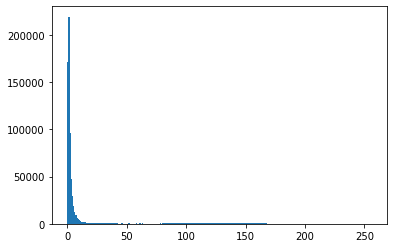

In [68]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

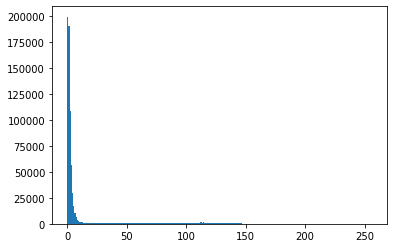

In [80]:
plt.hist(cc.ravel(),256,[0,256])
plt.show()

In [94]:
ori = cv2.imread('Desktop/Thesis/Evaluation/ann/1_fake.png')
cc = cv2.imread('Desktop/Thesis/Evaluation/cyc/1_fake.png')
pi = cv2.imread('Desktop/Thesis/Evaluation/hd/1_fake.png')
th = cv2.imread('Desktop/Threshold/paired/1.jpg')

In [106]:
hist1,bins = np.histogram(ori.ravel(),256,[0,256])
hist2,bins = np.histogram(cc.ravel(),256,[0,256])
hist3,bins = np.histogram(pi.ravel(),256,[0,256])

In [110]:
cv2.compareHist(hist1, hist3, cv2.HISTCMP_CORREL)

0.9009724512979445